**Hypothesis:**
1. People who regularly exercise have higher average GPAs.
2. People who exercise in the morning get more sleep than those who exercise at evening/night.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
import scipy.stats as stats
from pandas import DataFrame
plots.style.use("fast")

In [114]:
df = pd.read_csv("110project.csv")
df = df.iloc[0:43]

h1df = DataFrame(df.iloc[:,[3,12]])
h1df.dropna(inplace=True)

h2df = DataFrame(df.iloc[:,[6,7]])
h2df.dropna(inplace=True)

# Hypothesis 1

In [18]:
# Hypothesis 1
# null_hypothesis: regular exercise does not affect GPA
# alt_hypothesis: students who regularly exercise have a higher GPA on average
#
# test_stat_null: list of all GPAs, n=41, random sample
# test_stat_alt: list of regular exercise (>2 hrs) GPAs, n=41, bootstrap sample

h1df

,How long are you physically active during the day?,Current GPA
0,1-2 hours,4
1,1-2 hours,3.75
2,1-2 hours,3.79
3,1-2 hours,2.8
4,1-2 hours,3.8
5,1-2 hours,3.8
6,3-4 hours,3.8
7,1-2 hours,3.3
8,Negligible (>1 hour),3.88
9,1-2 hours,3.7


In [96]:
h1df = h1df.replace({"Negligible (>1 hour)": 0, "1/2 hour ": 1, "1-2 hours": 2, "3-4 hours": 3, "More than 4 hours": 4})
h1df.columns = ["Hours", "GPA"]
h1df["GPA"] = h1df["GPA"].astype(float)

# Approximately normal (graph is funky, but I would assume this to be normal)
#h1df["Hours"].hist()
#h1df["GPA"].hist()

In [84]:
h1df_simulated = h1df[h1df["Hours"] > 2]
h1df_simulated = h1df_simulated.sample(41, replace=True)

All Mean GPA: 3.643414634146342


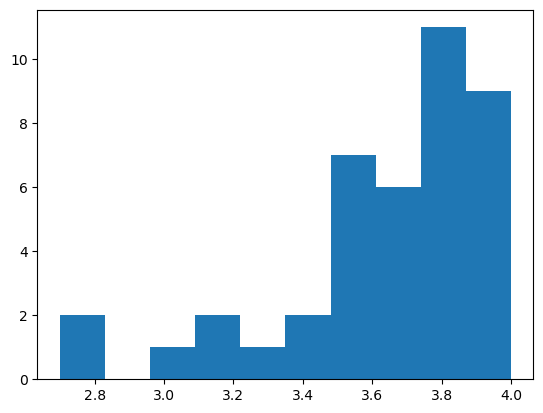

In [94]:
plots.hist(h1df["GPA"])
print("All Mean GPA: " + str(np.mean(h1df["GPA"])))

Reg. Exercise Mean GPA: 3.7909756097560985


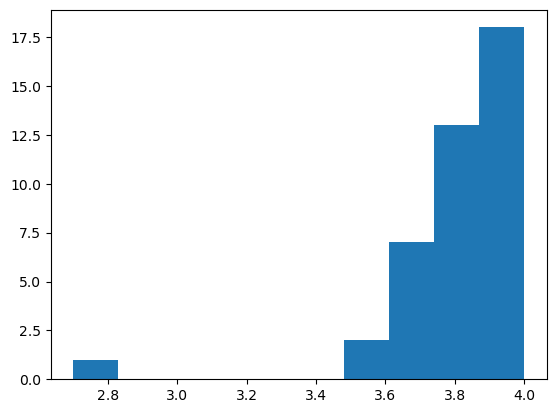

In [95]:
plots.hist(h1df_simulated["GPA"])
print("Reg. Exercise Mean GPA: " + str(np.mean(h1df_simulated["GPA"])))

In [86]:
t, p = stats.ttest_ind(h1df["GPA"], h1df_simulated["GPA"])
p

0.013823022697401455

At p=0.01382 and a=0.05, we reject the null hypothesis.

# Hypothesis 2

In [97]:
# Hypothesis 2
# null_hypothesis: exercise time does not affect amount of sleep
# alt_hypothesis: morning exercise increases amount of sleep
#
# test_stat_null: list of sleep times, n=40, random sample
# test_stat_alt: list of morning exerciser sleep times, n=40, bootstrap sample

h2df

,At what time do you workout on a daily basis?,How many hours of sleep do you get on average each night?
0,Evening,6
1,Varies every day,8
2,Varies every day,7
3,Afternoon,8
4,Evening,6
5,Varies every day,8
6,Afternoon,7
7,Morning,7
8,Varies every day,7
9,Varies every day,8


In [118]:
h2df = h2df.replace({"Morning": 1, "Afternoon": 2, "Evening": 3, "Night time": 4})
h2df.columns = ["Exercise Time", "Sleep Hours"]
h2df["Exercise Time"] = pd.to_numeric(h2df["Exercise Time"], errors ='coerce').fillna(0).astype('int')
h2df["Sleep Hours"] = h2df["Sleep Hours"].astype(float)
h2df

,Exercise Time,Sleep Hours
0,3,6.0
1,0,8.0
2,0,7.0
3,2,8.0
4,3,6.0
5,0,8.0
6,2,7.0
7,1,7.0
8,0,7.0
9,0,8.0


In [119]:
h2df_simulated = h2df[h2df["Exercise Time"] == 1]
h2df_simulated = h2df_simulated.sample(40, replace=True)

All Mean Sleep Hours: 7.175


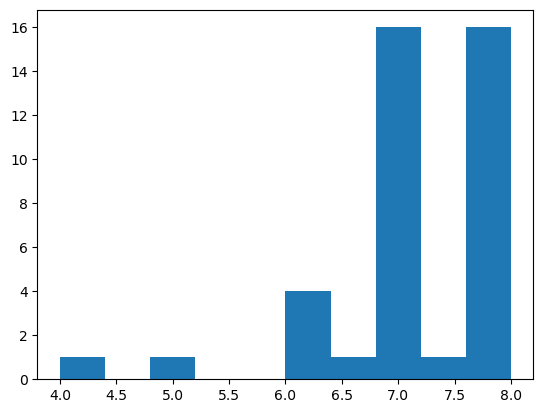

In [120]:
plots.hist(h2df["Sleep Hours"])
print("All Mean Sleep Hours: " + str(np.mean(h2df["Sleep Hours"])))

Morning Exercise Mean Sleep Hours: 6.975


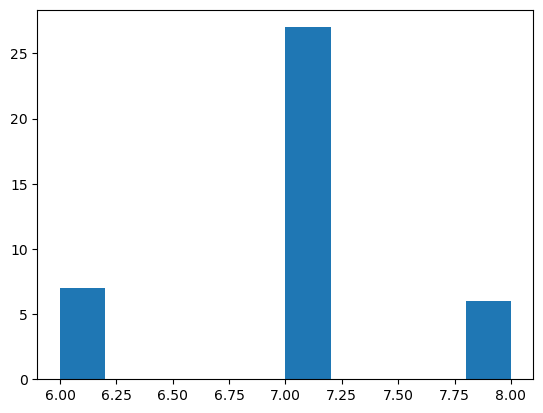

In [121]:
plots.hist(h2df_simulated["Sleep Hours"])
print("Morning Exercise Mean Sleep Hours: " + str(np.mean(h2df_simulated["Sleep Hours"])))

In [122]:
t, p = stats.ttest_ind(h2df["Sleep Hours"], h2df_simulated["Sleep Hours"])
p

0.24384347867024167

At p=0.24384 and a=0.05, we fail to reject the null hypothesis.